# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import scipy.stats as st

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
df.describe()
df['IncomePerCap'].describe()
medijalna_placa = df['IncomePerCap'].median()
prosjecna_placa = df['IncomePerCap'].mean()
print(f"Prosječna plaća: {prosjecna_placa:.2f}\nMedijalna plaća: {medijalna_placa:.2f}")

Prosječna plaća: 23981.77
Medijalna plaća: 23460.00


Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

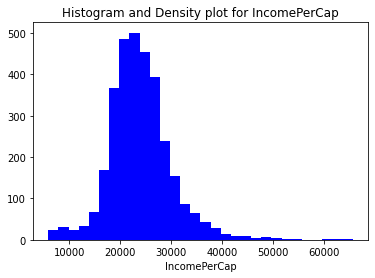

(0.0637621121184162, 0.0009999999999998899)


In [ ]:
plt.hist(df['IncomePerCap'], bins=30, color='blue')
plt.title('Histogram and Density plot for IncomePerCap')
plt.xlabel('IncomePerCap')
plt.show()

# provjera normalnosti podataka stupca "IncomePerCap"
kstest_result = diagnostic.kstest_normal(df["IncomePerCap"], dist='norm')
print(kstest_result)

# p-vrijednost je mala što znači da odbacujemo hipotezu da su normalno distribuirani

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df['TotalPop'].describe()

count        3,220.00
mean        99,409.35
std        319,305.45
min             85.00
25%         11,218.00
50%         26,035.00
75%         66,430.50
max     10,038,388.00
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

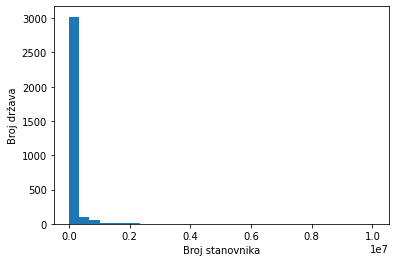

(0.37787608613878587, 0.0009999999999998899)


In [ ]:
plt.hist(df['TotalPop'], bins=30)
plt.xlabel('Broj stanovnika')
plt.ylabel('Broj država')
plt.show()

kstest_result = diagnostic.kstest_normal(df['TotalPop'], dist='norm')
print(kstest_result)
#H0 - normalno distribuirano. Vrijednost p je vrlo mala što znači da odbacujemo nultu hipotezu tj. da podaci nisu normalno distribuirani

## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [ ]:
# Računanje Pearsonovog koeficijenta korelacije i p-vrijednosti za IncomePerCap i Unemployment
pearson_corr, pearson_pvalue = stats.pearsonr(df['IncomePerCap'], df['Unemployment'])
print("Pearsonov koeficijent korelacije: {:.2f}".format(pearson_corr))
print("p-vrijednost: {:.2e}".format(pearson_pvalue))
# -0.55 -> negativno umjerena korelacija
# 2.04e-251 

# Računanje Spearmanovog koeficijenta korelacije i p-vrijednosti za IncomePerCap i Unemployment
spearman_corr, spearman_pvalue = stats.spearmanr(df['IncomePerCap'], df['Unemployment'])
print("Spearmanov koeficijent korelacije: {:.2f}".format(spearman_corr))
print("p-vrijednost: {:.2e}".format(spearman_pvalue))
# -0.56 -> negativno umjerena korelacija
# 1.86e-266

Pearsonov koeficijent korelacije: -0.55
p-vrijednost: 2.04e-251
Spearmanov koeficijent korelacije: -0.56
p-vrijednost: 1.86e-266


## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [ ]:
ny_data = df[df['State'] == 'New York']
ca_data = df[df['State'] == 'California']

ny_income_mean = ny_data['IncomePerCap'].mean()
ny_income_median = ny_data['IncomePerCap'].median()

ca_income_mean = ca_data['IncomePerCap'].mean()
ca_income_median = ca_data['IncomePerCap'].median()

print(f"New York\nMean: {ny_income_mean:.2f}\nMedian: {ny_income_median}")
print(f"\nCalifornia \nMean: {ca_income_mean:.2f}\nMedian: {ca_income_median}")
#Stanovnici države NewYork i Californije zarađuju približno jednako

New York
Mean: 28189.76
Median: 25891.0

California 
Mean: 27902.60
Median: 27146.5


Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [ ]:
#H0 - nema značajne razlike u dohotku stanovnika Ny i Ca
t_statistic, p_value = stats.ttest_ind(ny_data['IncomePerCap'], ca_data['IncomePerCap'], equal_var=False)

print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

# t-statistika - mjeri razliku između prosječnih vrijednosti
# P-vrijednost je približno 85% što znači da pihvacamo početnu hipotezu tj. nema statistički značajne razlike u dohotku stanovnika ovih država

t-statistic:  0.19665849300151653
p-value:  0.8444542920395708


## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

In [ ]:
a,b = st.t.interval(confidence=0.95, df=len(ny_data['IncomePerCap']),loc=np.mean(ny_data['IncomePerCap']), scale=st.sem(ny_data['IncomePerCap']))

In [ ]:
c,d = st.t.interval(confidence=0.95, df=len(ca_data['IncomePerCap']),loc=np.mean(ca_data['IncomePerCap']), scale=st.sem(ca_data['IncomePerCap']))

<BarContainer object of 4 artists>

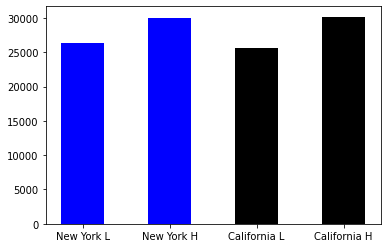

In [ ]:
colors = ['blue', 'blue', 'black', 'black']
data = {'New York L': a, 'New York H': b, 'California L': c, 'California H': d}
plt.bar(list(data.keys()), data.values(), color=colors, width=0.5)

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

Pearson's correlation coefficient:  0.08727386609551789


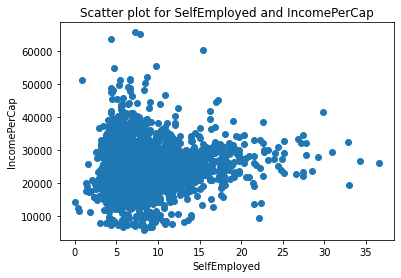

In [ ]:
corr = df['SelfEmployed'].corr(df['IncomePerCap'])
print("Pearson's correlation coefficient: ", corr)

plt.scatter(df['SelfEmployed'], df['IncomePerCap'])
plt.title('Scatter plot for SelfEmployed and IncomePerCap')
plt.xlabel('SelfEmployed')
plt.ylabel('IncomePerCap')
plt.show()

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

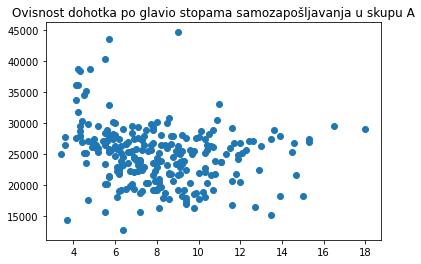

In [ ]:
subset_A = df[df['State'].isin(['Wisconsin', 'Tennessee', 'Minnesota'])]
corr_coef, p_value = st.pearsonr(subset_A['SelfEmployed'], subset_A['IncomePerCap'])
plt.scatter(subset_A['SelfEmployed'], subset_A['IncomePerCap'])
plt.title('Ovisnost dohotka po glavio stopama samozapošljavanja u skupu A')
plt.show()

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

Minnesota
Koeficijent korelacija: -0.2538551921654062
P-vrijednost: 0.017665199300911944

Tennessee
Koeficijent korelacija: -0.23836048684913153
P-vrijednost: 0.020011631955528172

Wisconsin
Koeficijent korelacija: -0.32905300016378525
P-vrijednost: 0.004768134887745218


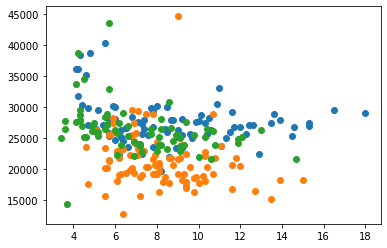

In [ ]:
Minessota = df[df['State'] == 'Minnesota']
Tennessee = df[df['State'] == 'Tennessee']
Wisconsin = df[df['State'] == 'Wisconsin']
M_corr_coef, M_p_value = st.pearsonr(Minessota['SelfEmployed'], Minessota['IncomePerCap'])
T_corr_coef, T_p_value = st.pearsonr(Tennessee['SelfEmployed'], Tennessee['IncomePerCap'])
W_corr_coef, W_p_value = st.pearsonr(Wisconsin['SelfEmployed'], Wisconsin['IncomePerCap'])
print(f"Minnesota\nKoeficijent korelacija: {M_corr_coef}\nP-vrijednost: {M_p_value}")
print(f"\nTennessee\nKoeficijent korelacija: {T_corr_coef}\nP-vrijednost: {T_p_value}")
print(f"\nWisconsin\nKoeficijent korelacija: {W_corr_coef}\nP-vrijednost: {W_p_value}")
plt.scatter(Minessota['SelfEmployed'], Minessota['IncomePerCap'])
plt.scatter(Tennessee['SelfEmployed'], Tennessee['IncomePerCap'])
plt.scatter(Wisconsin['SelfEmployed'], Wisconsin['IncomePerCap'])
plt.show()



Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

In [ ]:
B = df[(df['State'] == 'New Jersey') | (df['State'] == 'Kansas') | (df['State'] == 'Rhode Island')]
stats.pearsonr(B['SelfEmployed'], B['IncomePerCap'])

PearsonRResult(statistic=0.08045896383806686, pvalue=0.4033930682657025)

In [ ]:
NJ = df[df['State'] == 'New Jersey']
stats.pearsonr(NJ['SelfEmployed'], NJ['IncomePerCap'])

PearsonRResult(statistic=0.48044784713362815, pvalue=0.027488944757806215)

In [ ]:
Kansas = df[df['State'] == 'Kansas']
stats.pearsonr(Kansas['SelfEmployed'], Kansas['IncomePerCap'])

PearsonRResult(statistic=0.25810299714436924, pvalue=0.007853351846832413)

In [ ]:
RhodeIsland = df[df['State'] == 'Rhode Island']
stats.pearsonr(RhodeIsland['SelfEmployed'], RhodeIsland['IncomePerCap'])

PearsonRResult(statistic=0.9021788382149803, pvalue=0.0361831020157593)

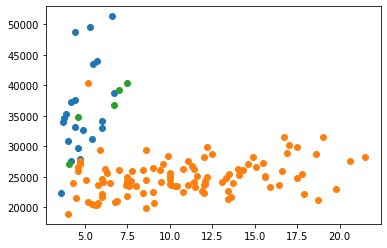

In [ ]:
plt.scatter(NJ['SelfEmployed'], NJ['IncomePerCap'])
plt.scatter(Kansas['SelfEmployed'], Kansas['IncomePerCap'])
plt.scatter(RhodeIsland['SelfEmployed'], RhodeIsland['IncomePerCap'])
plt.show()